# Сборный проект 2. Исследование уровня потребительской лояльности

**Описание**

По заказу большой телекоммуникационной компании, оказывающей услуги на территории всего СНГ, проведена работа по определению текущего уровеня потребительской лояльности, или NPS, среди клиентов из России.

Исследовательская работа основана на данных опроса пользователей, основанного на методике проедения социальных опросов, оценивающих потребительскую лояльность.

По результатам работы сформирован дашборд с результатами опроса и подготовлена презентация с описанием и итогами проведенной работы.

В рамках работы:
1) Получен доступ к базе данных SQLite

2) Проведена выгрузка данных и предобработка данных

3) Сформирована аггрегированная таблица-источник для дашборда

4) Создан дашборд и подготовлена презентация, содержащие в т.ч. следующие результаты исследования:

- распределение участников опроса по возрасту, полу и возрасту, периоду регистрации, активности по городам?
- респределение по группам лояльности к сервису
- расчет NPS
- описание пользователей-сторонников

## Получение доступа к БД

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
from sqlalchemy import create_engine

### Зададим путь к БД и создадим подключение

In [2]:
try:
    path_to_db = '/datasets/telecomm_csi.db'
except:
    path_to_db = 'https://??????/datasets/telecomm_csi.db'

# path_to_db = 'C:/Users/Asus/Яндекс_практикум/8 Сборный проект 2/telecomm_csi.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [3]:
#для локального подключения
# path_to_db = 'C:/Users/Asus/Яндекс_практикум/8 Сборный проект 2/telecomm_csi.db'
# engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

### Проверим подключение и рассмотрим таблицы из БД

In [4]:
#рассмотрим, что из себя представляют таблицы БД, выявим возможные пропуски
query_1 = """
SELECT * FROM books;
"""
query_2 = """
SELECT * FROM authors;
"""
query_3 = """
SELECT * FROM publishers;
"""
query_4 = """
SELECT * FROM ratings;
"""
query_5 = """
SELECT * FROM reviews;
"""

In [5]:
df_user = pd.read_sql(query_1, engine)
display(df_user.head(5))
display(df_user.info())

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
0,A001A2,2320,45.0,1.0,ANDROID,SMARTPHONE,55,5,5,8,10
1,A001WF,2344,53.0,0.0,ANDROID,SMARTPHONE,21,5,5,8,10
2,A003Q7,467,57.0,0.0,ANDROID,SMARTPHONE,28,6,9,6,10
3,A004TB,4190,44.0,1.0,IOS,SMARTPHONE,38,4,4,8,10
4,A004XT,1163,24.0,0.0,ANDROID,SMARTPHONE,39,2,6,8,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502493 entries, 0 to 502492
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         502493 non-null  object 
 1   lt_day          502493 non-null  int64  
 2   age             501939 non-null  float64
 3   gender_segment  501192 non-null  float64
 4   os_name         502493 non-null  object 
 5   cpe_type_name   502493 non-null  object 
 6   location_id     502493 non-null  int64  
 7   age_gr_id       502493 non-null  int64  
 8   tr_gr_id        502493 non-null  int64  
 9   lt_gr_id        502493 non-null  int64  
 10  nps_score       502493 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 42.2+ MB


None

In [6]:
df_loc = pd.read_sql(query_2, engine)
display(df_loc.head(5))
display(df_loc.info())

,location_id,city,country
0,1,Архангельск,Россия
1,2,Астрахань,Россия
2,3,Балашиха,Россия
3,4,Барнаул,Россия
4,5,Белгород,Россия


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  62 non-null     int64 
 1   city         62 non-null     object
 2   country      62 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [7]:
df_age_segment = pd.read_sql(query_3, engine)
display(df_age_segment.head(10))
display(df_age_segment.info())

,age_gr_id,bucket_min,bucket_max,title
0,1,NaN,15.0,01 до 16
1,2,16.0,24.0,02 16-24
2,3,25.0,34.0,03 25-34
3,4,35.0,44.0,04 35-44
4,5,45.0,54.0,05 45-54
5,6,55.0,64.0,06 55-64
6,7,66.0,NaN,07 66 +
7,8,NaN,NaN,08 n/a


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_gr_id   8 non-null      int64  
 1   bucket_min  6 non-null      float64
 2   bucket_max  6 non-null      float64
 3   title       8 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 384.0+ bytes


None

In [8]:
df_traffic_segment = pd.read_sql(query_4, engine)
display(df_traffic_segment.head(5))
display(df_traffic_segment.info())

,tr_gr_id,bucket_min,bucket_max,title
0,1,0.00,0.00,01 0
1,2,0.00,0.01,01 0-0.01
2,3,0.01,0.10,02 0.01-0.1
3,4,0.10,1.00,03 0.1-1
4,5,1.00,5.00,04 1-5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tr_gr_id    25 non-null     int64  
 1   bucket_min  25 non-null     float64
 2   bucket_max  24 non-null     float64
 3   title       25 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 928.0+ bytes


None

In [9]:
df_lifetime_segment = pd.read_sql(query_5, engine)
display(df_lifetime_segment.head(10))
display(df_lifetime_segment.info())

,lt_gr_id,bucket_min,bucket_max,title
0,1,1.0,1.0,01 1
1,2,2.0,2.0,02 2
2,3,3.0,3.0,03 3
3,4,4.0,6.0,04 4-6
4,5,7.0,12.0,05 7-12
5,6,13.0,24.0,06 13-24
6,7,25.0,36.0,07 25-36
7,8,36.0,NaN,08 36+


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lt_gr_id    8 non-null      int64  
 1   bucket_min  8 non-null      float64
 2   bucket_max  7 non-null      float64
 3   title       8 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 384.0+ bytes


None

### Проверим отдельные значения

In [10]:
df_user['age'].describe()

count    501939.000000
mean         39.621946
std          11.188249
min          10.000000
25%          31.000000
50%          38.000000
75%          47.000000
max          89.000000
Name: age, dtype: float64

In [11]:
df_user['lt_day'].describe()

count    502493.000000
mean       1868.841439
std        1683.701762
min         -21.000000
25%         533.000000
50%        1239.000000
75%        3064.000000
max        9162.000000
Name: lt_day, dtype: float64

<AxesSubplot:>

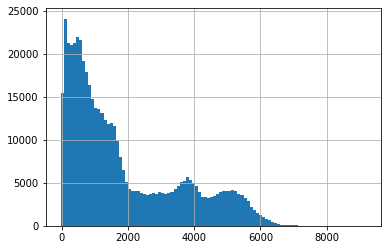

In [12]:
df_user['lt_day'].hist(bins=100)

<AxesSubplot:>

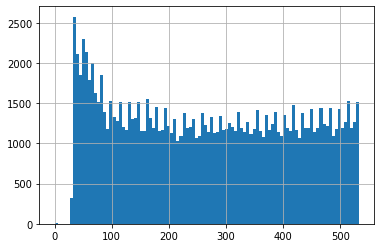

In [13]:
df_user['lt_day'].hist(bins=100, range=(0,533))

В целом состав данных понятен. Пропуски в данных объяснимы. В таблицах lifetime_segment, traffic_segment, age_segment пропущенные значения - неопределенные границы сегментов, например, для 66+  - невозможно определить верхнюю границу.

В таблице user часть данных о возрасте и поле отсутствует (0,028% и 0,025%). Данными пропусками можно принебречь, предобработка не требуется. При создании итоговой выгрузки исключим данные с пропусками.

Также из таблиц lifetime_segment, traffic_segment, age_segment потребуются наименования сегментов, которые в исходных таблицах записаны в формате "0id min-max"

Есть пользователи, время жизни которых отрицательное. В задании требуется задать для каждого пользователя категорию, описывающую, явялется ли пользователь "новым пользователем". Однако, условия не определены. Как видно из статистики поля lt_day более 75% пользователей зарегеистрированы более 533 дней (больше полутора лет). Распределение количесва пользователей от времени "жизни" для 25% пользователей в целом равномероно после 100 дня жизни. 

На этапе выгрузки данных:
1) Заменим категории 1 и 0 в обозначении пола пользователя gender_segment в таблице user на "женщина"/"мужчина" (man/woman)

2) Создадим новое поле с категорией "Новый юзер", "Старый юзер" в зависимости от количества дней «жизни» клиента lt_day в таблице user (new user/old user)

3) Создадим новое поле с группой пользователя на основании оценки клиента в NPS-опросе:
- 9-10 баллов — «cторонники» (англ. promoters)
- 7-8 баллов — «нейтралы» (англ. passives)
- 0-6 баллов — «критики» (англ. detractors)

## Выгрузка требуемых данных 

### Создадим необходимый запрос

In [14]:
query = """
SELECT u.user_id,
       u.lt_day,
       CASE
           WHEN u.lt_day <= 365 THEN 'new user'
           ELSE 'old user'
       END AS is_new,
       SUBSTR(ls.title, 3) AS lifetime_segment,
       u.age,
       SUBSTR(ags.title, 3) AS age_segment,
       CASE
           WHEN u.gender_segment == 0 THEN 'man'
           WHEN u.gender_segment == 1 THEN 'woman'
       END AS gender_segment,
       u.os_name,
       u.cpe_type_name,
       l.country, 
       l.city,  
       u.nps_score,
       CASE 
           WHEN u.nps_score >= 9 THEN 'promoter'
           WHEN u.nps_score <= 6 THEN 'detractor'
           ELSE 'passive'
       END AS nps_group,
       SUBSTR(ts.title, 3) AS traffic_segment
FROM user AS u
LEFT JOIN location AS l ON u.location_id = l.location_id
LEFT JOIN age_segment AS ags ON u.age_gr_id = ags.age_gr_id
LEFT JOIN traffic_segment AS ts ON u.tr_gr_id = ts.tr_gr_id
LEFT JOIN lifetime_segment AS ls ON u.lt_gr_id = ls.lt_gr_id
WHERE u.age IS NOT NULL AND gender_segment IS NOT NULL AND u.lt_day > 0;
""" 

### Проверим и сохраним в файл 

In [15]:
df = pd.read_sql(query, engine)
display(df.head(10))
display(df.info())

,user_id,lt_day,is_new,lifetime_segment,age,age_segment,gender_segment,os_name,cpe_type_name,country,city,nps_score,nps_group,traffic_segment
0,A001A2,2320,old user,36+,45.0,45-54,woman,ANDROID,SMARTPHONE,Россия,Уфа,10,promoter,1-5
1,A001WF,2344,old user,36+,53.0,45-54,man,ANDROID,SMARTPHONE,Россия,Киров,10,promoter,1-5
2,A003Q7,467,old user,13-24,57.0,55-64,man,ANDROID,SMARTPHONE,Россия,Москва,10,promoter,20-25
3,A004TB,4190,old user,36+,44.0,35-44,woman,IOS,SMARTPHONE,Россия,РостовнаДону,10,promoter,0.1-1
4,A004XT,1163,old user,36+,24.0,16-24,man,ANDROID,SMARTPHONE,Россия,Рязань,10,promoter,5-10
5,A005O0,5501,old user,36+,42.0,35-44,woman,ANDROID,SMARTPHONE,Россия,Омск,6,detractor,5-10
6,A0061R,1236,old user,36+,45.0,45-54,man,ANDROID,SMARTPHONE,Россия,Уфа,10,promoter,10-15
7,A009KS,313,new user,7-12,35.0,35-44,man,ANDROID,SMARTPHONE,Россия,Москва,10,promoter,45-50
8,A00AES,3238,old user,36+,36.0,35-44,woman,ANDROID,SMARTPHONE,Россия,СанктПетербург,10,promoter,1-5
9,A00F70,4479,old user,36+,54.0,45-54,woman,ANDROID,SMARTPHONE,Россия,Волгоград,9,promoter,15-20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501152 entries, 0 to 501151
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           501152 non-null  object 
 1   lt_day            501152 non-null  int64  
 2   is_new            501152 non-null  object 
 3   lifetime_segment  501152 non-null  object 
 4   age               501152 non-null  float64
 5   age_segment       501152 non-null  object 
 6   gender_segment    501152 non-null  object 
 7   os_name           501152 non-null  object 
 8   cpe_type_name     501152 non-null  object 
 9   country           501152 non-null  object 
 10  city              501152 non-null  object 
 11  nps_score         501152 non-null  int64  
 12  nps_group         501152 non-null  object 
 13  traffic_segment   501152 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 53.5+ MB


None

In [16]:
df.pivot_table(index=['is_new', 'lifetime_segment'], values='nps_score', aggfunc='mean')

nps_score
is_new   lifetime_segment           
new user  1                 8.692308
          13-24             7.990443
          2                 7.967787
          3                 8.050080
          4-6               8.007741
          7-12              7.922994
old user  13-24             7.716531
          25-36             7.514088
          36+               7.309343

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>
Как видим, новые юзеры также оказались в сегменте 13-24. Что довольно странно. Но действительно, для части пользователей с днями "жизни" 360-365 дней в признаке "lifetime_segment" указано 13-24. Всего таких пользователей 1151  

</div>

In [17]:
df_test = df.query('is_new == "new user"').sort_values(by='lifetime_segment')
#df_test = df_test.query('lifetime_segment == "13-24"')
df_test.head(50)

,user_id,lt_day,is_new,lifetime_segment,age,age_segment,gender_segment,os_name,cpe_type_name,country,city,nps_score,nps_group,traffic_segment
226834,LR6CUR,10,new user,1,37.0,35-44,man,ANDROID,SMARTPHONE,Россия,НабережныеЧелны,5,detractor,5-10
61276,D5TACT,2,new user,1,42.0,35-44,woman,ANDROID,SMARTPHONE,Россия,Москва,3,detractor,0.1-1
374527,TFDG3K,16,new user,1,43.0,35-44,woman,ANDROID,SMARTPHONE,Россия,Москва,10,promoter,40-45
132279,GU5USS,28,new user,1,35.0,35-44,man,ANDROID,SMARTPHONE,Россия,Москва,10,promoter,5-10
27055,BEKL3Q,2,new user,1,41.0,35-44,man,ANDROID,SMARTPHONE,Россия,Томск,9,promoter,1-5
7763,AEHHWI,21,new user,1,27.0,25-34,man,ANDROID,SMARTPHONE,Россия,Москва,7,passive,5-10
471581,YGQKQF,2,new user,1,48.0,45-54,woman,ANDROID,SMARTPHONE,Россия,Хабаровск,10,promoter,1-5
63298,D9O91R,26,new user,1,37.0,35-44,woman,IOS,SMARTPHONE,Россия,Москва,9,promoter,5-10
293936,P8PJSL,20,new user,1,46.0,45-54,woman,ANDROID,SMARTPHONE,Россия,Москва,10,promoter,20-25
403491,UXSE32,3,new user,1,56.0,55-64,man,ANDROID,SMARTPHONE,Россия,Москва,10,promoter,0.1-1


array([[<AxesSubplot:title={'center':'lt_day'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'nps_score'}>, <AxesSubplot:>]],
      dtype=object)

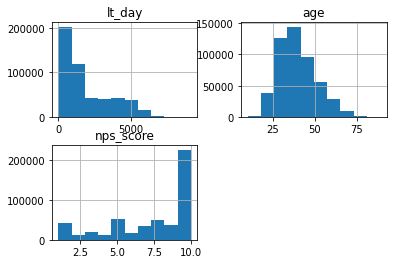

In [18]:
#общие кол-ые статистики
df.hist()

In [19]:
#сохраняем датафрейм в csv
df.to_csv('telecomm_csi_db_tableau.csv', index=False)

In [20]:
#для локального использования
#df.to_csv('C:/Users/Asus/Яндекс_практикум/telecomm_csi_db_tableau.csv', index=False)

Выгруженный файл корректный и соответствует датафрейму. Для проверки: в MS Escel из файла csv импортировалось ровно 501152 строк без пустых значений и ошибок.

## Дашборд:
Дашборд по [ссылке](https://public.tableau.com/app/profile/boris.shch/viz/Telecommdashboard/_1)

*Комментарий 1. Дашборд создавался в десктопной версии Tableau. При просмотре в веб версии 3 визуализации "распределение по " отображаются некорректно в окне просмотра из-за несовпадения автоопределения размеров области построения дашборда / рабочей области и браузера. Рекомендуется переключить режим просмотра "на полный экран"/"Full Screen"*

*Комментарий 2. Элементы визуализаций также являются фильтрами для остальных визуализаций и графиков, поэтому общие фильтры несут по больщому счёту вспомогательную функцию*

## Презентация:
Презентация по [ссылке](https://disk.yandex.ru/d/4bc6ACvU6Zth4Q)